# Geothermal Monitoring - Mogi Source Approach

The Mogi model is a classic analytical solution used in volcanology and geomechanics to describe surface deformation resulting from a point source of pressure change located in an elastic half-space. It was first introduced by Kiyoo Mogi in 1958 to model ground deformation due to magmatic intrusions, such as inflation or deflation of a magma chamber beneath a volcano.

Theoritical Basis & Assumptions:

- A point source at depth in an elastic half-space.
- Isotropic, homogeneous, linear elastic medium.
- Surface deformation is caused by a volumetric change $\nabla V$ at the source

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Surface Displacement Equation

$$
u_x = \frac{(1 - v)\Delta V}{\pi} \cdot \frac{x-x_0}{R^{2}}
$$
$$
u_y = \frac{(1 - v)\Delta V}{\pi} \cdot \frac{y-y_0}{R^{2}}
$$
$$
u_z = \frac{(1 - v)\Delta V}{\pi} \cdot \frac{d}{R^{2}}
$$

- $(x,y)$: horizontal coordinates on the surface,
- $d$: depth of point source
- $\nabla V$: the source volume change,
- $v$: the poisson ration
- $u_x, u_y, u_z$: ​displacement components in the $x, y, z$ directions, respectively
- $R$: $\sqrt{(x - x_0)^{2} + (y - y_0)^{2} + d^{2}}$

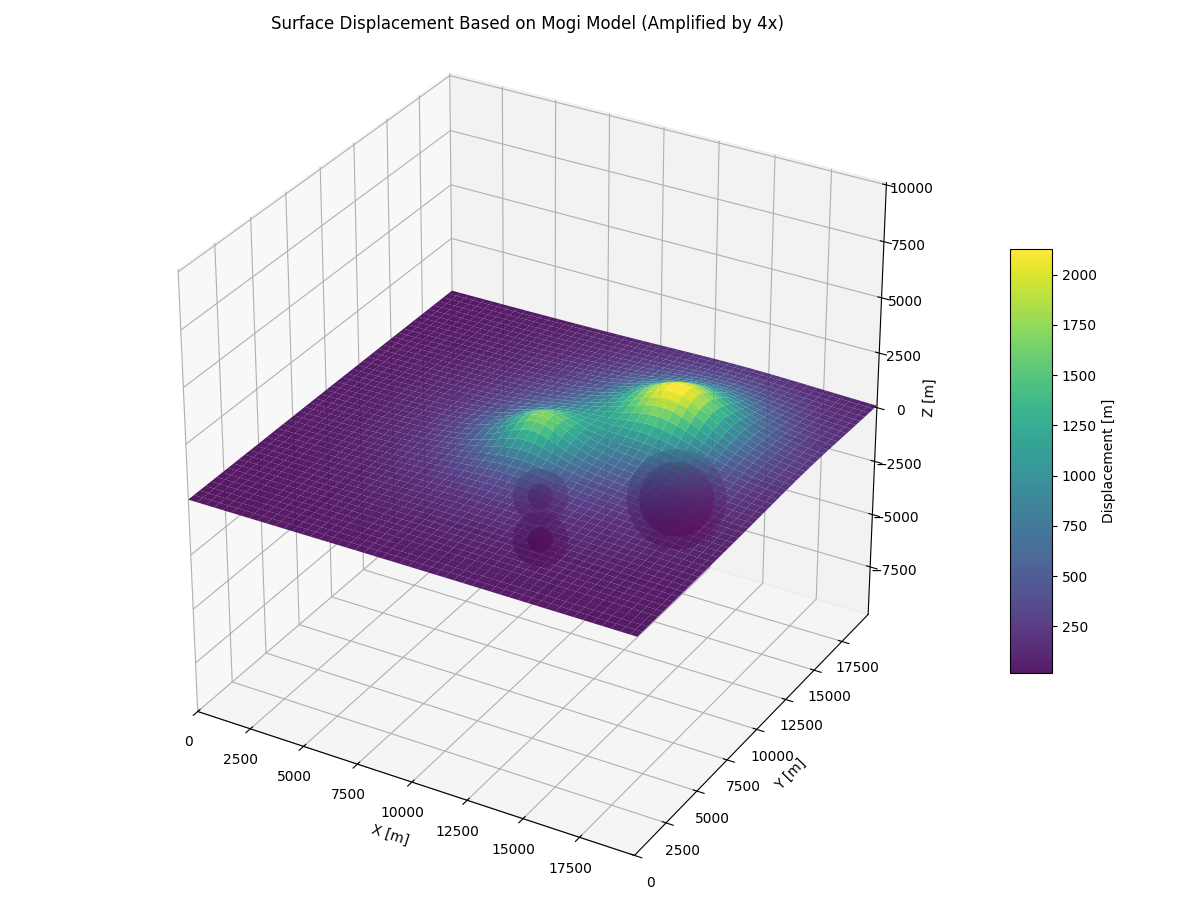

In [ ]:
%matplotlib widget

from mogi import mogi_source, mogi_surface

# Surface parameters
nx, ny = 200, 200
x_start, y_start = 0, 0
dx, dy = 100, 100
x0, y0 = (nx*dx)/2, (ny*dy)/2 # source center
v = 0.25 # Poisson's ratio

# Get Mogi Sphere
d1 = 2000 # source depth (m)
r1 = 500 # sphere radius in m
r2 = 1100 # sphere radius in m
xs1, ys1, zs1, v1 = mogi_source(x0, y0, d1, r1) # volume change (m^3)
xs2, ys2, zs2, v2 = mogi_source(x0, y0, d1, r2) # volume change (m^3)

d2 = 4000
r3 = 500 # sphere radius in m
r4 = 1100 # sphere radius in m
xs3, ys3, zs3, v3 = mogi_source(x0, y0, d2, r3) # volume change (m^3)
xs4, ys4, zs4, v4 = mogi_source(x0, y0, d2, r4) # volume change (m^3)

d3 = 3000
r5 = 1500 # sphere radius in m
r6 = 2000 # sphere radius in m
xs5, ys5, zs5, v5 = mogi_source(x0+4000, y0+4000, d3, r5) # volume change (m^3)
xs6, ys6, zs6, v6 = mogi_source(x0+4000, y0+4000, d3, r6) # volume change (m^3)

# Get surfaces
X, Y, Z_mogi = mogi_surface(nx, ny, x_start, y_start, dx, dy, x0, y0, d1, (v2-v1), v)
X, Y, Z_mogi2 = mogi_surface(nx, ny, x_start, y_start, dx, dy, x0, y0, d2, (v4-v3), v)
X, Y, Z_mogi3 = mogi_surface(nx, ny, x_start, y_start, dx, dy, x0+4000, y0+4000, d3, (v6-v5), v)

# Calculate displacement resultant
Z_mogi_resultant = Z_mogi + Z_mogi2 + Z_mogi3

# Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Compute axis ranges
x_range = X.max() - X.min()
y_range = Y.max() - Y.min()
z_range = Z_mogi.max() - Z_mogi.min()

# Center points
x_mid = (X.max() + X.min()) / 2
y_mid = (Y.max() + Y.min()) / 2
z_mid = (Z_mogi.max() + Z_mogi.min()) / 2  # include sphere depth

# Set equal limits
max_range = max(x_range, y_range, z_range)

ax.set_xlim(x_mid - max_range/2, x_mid + max_range/2)
ax.set_ylim(y_mid - max_range/2, y_mid + max_range/2)
ax.set_zlim(z_mid - max_range/2, z_mid + max_range/2)

# Ensure 1:1:1 aspect ratio
ax.set_box_aspect([1, 1, 1])

# Plot displaced surface
amp = 4
surf = ax.plot_surface(X, Y, Z_mogi_resultant * amp, cmap='viridis', edgecolor='none', alpha=0.9)

# Plot the sphere
ax.plot_surface(xs1, ys1, zs1, color='red', alpha=0.7, edgecolor='none')
ax.plot_surface(xs2, ys2, zs2, color='crimson', alpha=0.3, edgecolor='none')

ax.plot_surface(xs3, ys3, zs3, color='red', alpha=0.7, edgecolor='none')
ax.plot_surface(xs4, ys4, zs4, color='crimson', alpha=0.3, edgecolor='none')

ax.plot_surface(xs5, ys5, zs5, color='red', alpha=0.7, edgecolor='none')
ax.plot_surface(xs6, ys6, zs6, color='crimson', alpha=0.3, edgecolor='none')

ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")
ax.set_title(f"Surface Displacement Based on Mogi Model (Amplified by {amp}x)")

# Colorbar for displacement values
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Displacement [m]")

plt.tight_layout()
plt.show()


Pressure Change & Temperature Change (Closed system -> no mass changes)

In [3]:
from mogi import pressure_change, temperature_changes

bulk_modulus = 20e10 # Pa -> GPa
alpha = 3e-5
rho = 2700 # kg/m3
delta_rho = -27 # kg/m3

d_pressure = pressure_change(bulk_modulus, v2-v1, v2)
d_temperature = temperature_changes(alpha, delta_rho, rho)

print("pressure change:", d_pressure/1e9, "GPa")
print("temperature change:", d_temperature, "K^-1")

pressure change: -181.21712997746053 GPa
temperature change: 333.3333333333333 K^-1


Next Step: Invert the workflow

In [ ]:
from mogi import estimate_mogi_volume_change